In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az
from scipy import stats 


### Action Learning Value

In [1]:
# select Act or Stim to model fit seperately
cond_act_stim = 'Act'
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
# select Action value learning and parkinsons disease
behAll = behAll[(behAll['block']==cond_act_stim)&(behAll['patient']=='PD')]
# the list of participant
subList_PD = np.unique(behAll['sub_ID'])
# number of models
n_models =  8
# declare waice variable
log_waic_models = np.zeros(n_models)
log_lppd_models = np.zeros(n_models)
# loop over list of participants
m = 5
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/hier/PD-HC/diagnosis/HierRL_diagnosis_same_lr_model{m+1}_data_{cond_act_stim}.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
log_lik = fit['log_lik']
print(log_lik.shape)
log_assessement = utils.waic(log_likelihood=log_lik)
log_waic_models = log_assessement['waic']
log_lppd_models = log_assessement['lppd']
print('waic: ', np.round(log_waic_models, 1), 'lppd: ', np.round(-log_lppd_models, 1))

NameError: name 'pd' is not defined

In [3]:
log_assessement

{'lppd': -24200.376780719085,
 'p_waic': 9810.032354486755,
 'waic': 68020.81827041168,
 'waic_se': 3.3081728912080144}

In [ ]:
# waic meaure
print('waic: ', np.round(log_waic_models, 1), 'lppd: ', np.round(-log_lppd_models, 1))

In [ ]:
68011.9 lppd:  24201.9

In [2]:
# select Act or Stim to model fit seperately
cond_act_stim = 'Stim'
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
# select Action value learning and parkinsons disease
behAll = behAll[(behAll['block']==cond_act_stim)&(behAll['patient']=='PD')]
# the list of participant
subList_PD = np.unique(behAll['sub_ID'])
# number of models
n_models =  8
# loop over list of participants
for m in range(n_models):
    print(f'Model {m}')
    # main directory of saving
    mainScarch = '/mnt/scratch/projects/7TPD/amin'
    # pickle fine in the scratch folder
    pickelDir = f'{mainScarch}/realdata/hier/PD-HC/diagnosis/HierRL_diagnosis_same_lr_model{m+1}_data_{cond_act_stim}.pkl'
    """Loading the pickle file of model fit from the subject directory"""
    loadPkl = utils.load_pickle(load_path=pickelDir)
    fit = loadPkl['fit'] 
    # get the linkelihood and comarision assessment       
    log_lik = fit['log_lik']
    log_assessement = utils.waic(log_likelihood=log_lik)
    print('model: ', str(m+1) , ', waic: ', np.round(log_assessement['waic'], 1), ', lppd: ', np.round(-log_assessement['lppd'], 1))

Model 0
model:  1 , waic:  68014.0 , lppd:  24200.9
Model 1


: 

In [35]:
# waic meaure
str(np.round(log_waic_models, 1)), str(np.round(-log_lppd_models, 1))

('141640.3', '52275.6')

In [4]:
# select Act or Stim to model fit seperately
cond_act_stim = 'Stim'
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
# select Action value learning and parkinsons disease
behAll = behAll[(behAll['block']==cond_act_stim)&(behAll['patient']=='PD')]
# loop over list of participants
mainScarch = '/mnt/scratch/projects/7TPD/amin'
# The adrees name of pickle file
pickelDir = f'{mainScarch}/realdata/hier/PD/diagnosis/HierRL_diagnosis_same_lr_model1_data_{cond_act_stim}.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
log_lik = fit['log_lik']
print(log_lik.shape)
log_assessement = utils.waic(log_likelihood=log_lik)
log_waic_models = log_assessement['waic']
log_lppd_models = log_assessement['lppd']

: 

In [ ]:
# waic meaure
str(np.round(log_waic_models, 1)), str(np.round(-log_lppd_models, 1))

('66397.9', '22858.5')

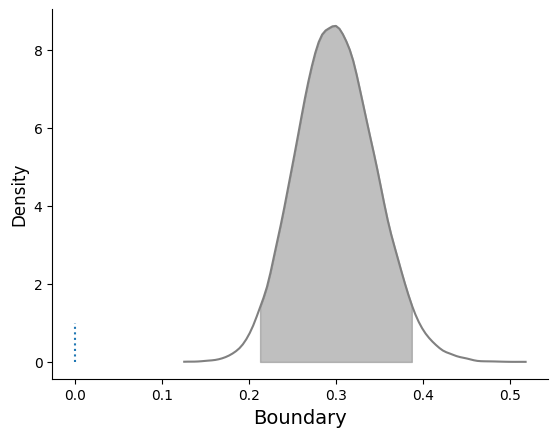

In [27]:
import plots

plots.plot_posterior(x=fit['transfer_hier_alpha_mu'].flatten(), xlabel='Boundary', ylabel='Density')
plt.vlines(0, 0, 1,linestyles='dotted')
